In [0]:
# activate R magic
%load_ext rpy2.ipython

#**Análise de Séries Temporais no Mercado Financeiro** - {quantmod}

##Modelagem financeira quantitativa

In [0]:
%%R
# http://www.quantmod.com

# Instalar e carregar os pacotes
install.packages("quantmod") # pacote para modelagem financeira quantitativa
install.packages("xts") #pacote para serie temporal
install.packages("moments") #pacote para serie temporal
library(quantmod)
library(xts)
library(moments)

In [0]:
%%R
# Seleção do período de análise
startDate = as.Date("2018-01-21")#data abertura cotação formatada com as.Date()
endDate = as.Date("2018-06-21")#data fechamento cotação formatada com as.Date

#**getSymbols()** - {quantmod}

### (cotação, fonte, início, fim)

In [21]:
%%R
# Download dos dados do período. Yahoo e Google oferecem serviço de Finance
# ?getSymbols # função pertence ao pacote quantmod
getSymbols("PETR4.SA", src = "yahoo", from = startDate, to = endDate, auto.assign = T)
# PETR4.SA = readRDS("PETR4.SA.rds")

R[write to console]: Warning:
R[write to console]:  PETR4.SA download failed; trying again.



[1] "PETR4.SA"


In [22]:
%%R
# Checando o tipo de dado retornado
class(PETR4.SA)

[1] "xts" "zoo"


In [23]:
%%R
is.xts(PETR4.SA)

[1] TRUE


In [11]:
%%R
# Mostra os primeiros registros para as ações da Petrobras
head(PETR4.SA)
# O index desse conjunto de dados é o índice

           PETR4.SA.Open PETR4.SA.High PETR4.SA.Low PETR4.SA.Close
2018-01-22         18.26         18.47        18.09          18.47
2018-01-23         18.40         18.46        18.00          18.24
2018-01-24         18.42         19.63        18.42          19.34
2018-01-25         19.34         19.34        19.34          19.34
2018-01-26         19.62         19.98        19.10          19.93
2018-01-29         19.67         20.05        19.57          19.85
           PETR4.SA.Volume PETR4.SA.Adjusted
2018-01-22        33920000          17.13501
2018-01-23        35567700          16.92163
2018-01-24        89768200          17.94212
2018-01-25               0          17.94212
2018-01-26        81989500          18.48948
2018-01-29        55726200          18.41526


In [24]:
%%R
# Analisando os dados de fechamento 
PETR4.SA.Close <- PETR4.SA[, "PETR4.SA.Close"] #analisando dados de fechamento dos registros
is.xts(PETR4.SA.Close)
# ?Cl

[1] TRUE


In [25]:
%%R 
head(Cl(PETR4.SA),5) #função Cl: extrai e transforma colunas de series temporais do dataset original por coluna

           PETR4.SA.Close
2018-01-22          18.47
2018-01-23          18.24
2018-01-24          19.34
2018-01-25          19.34
2018-01-26          19.93


#**Gráfico de Candles**

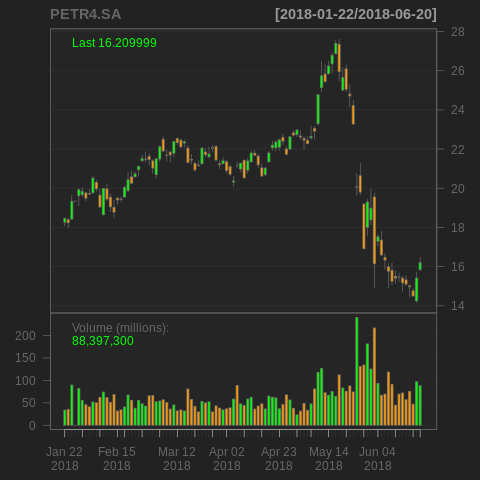

In [26]:
%%R
# Gráfico de candlestick da Petrobras
# ?candleChart
candleChart(PETR4.SA)


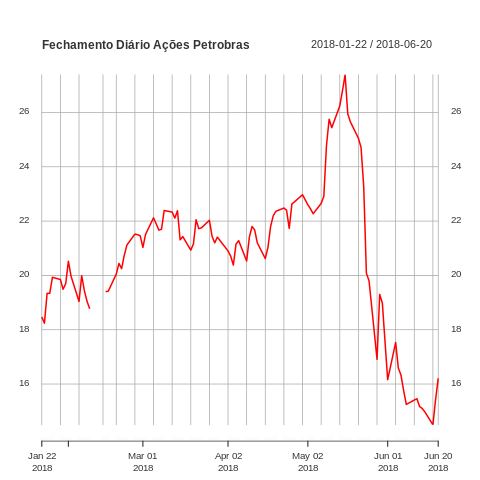

In [27]:
%%R
# Plot do fechamento
plot(PETR4.SA.Close, main = "Fechamento Diário Ações Petrobras",
     col = "red", xlab = "Data", ylab = "Preço", major.ticks = 'months',
     minor.ticks = FALSE)



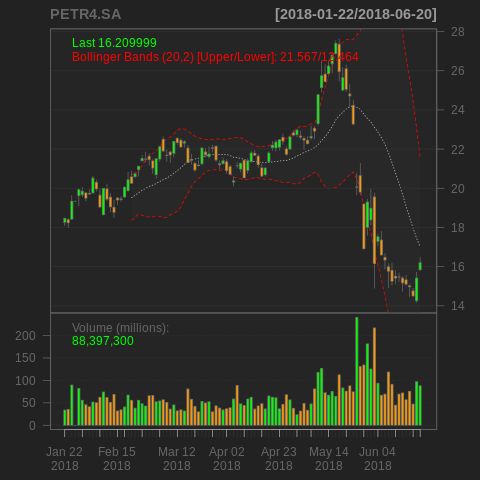

In [28]:
%%R
# Adicionado as bandas de bollinger ao gráfico, com média de 20 períodos e 2 desvios
# Como o desvio padrão é uma medida de volatilidade, 
# Bollinger Bands ajustam-se às condições de mercado. Mercados mais voláteis, 
# possuem as bandas mais distantes da média, enquanto mercados menso voláteis possuem as
# bancas mais próximas da média
?addBBands
addBBands(n = 20, sd = 2)



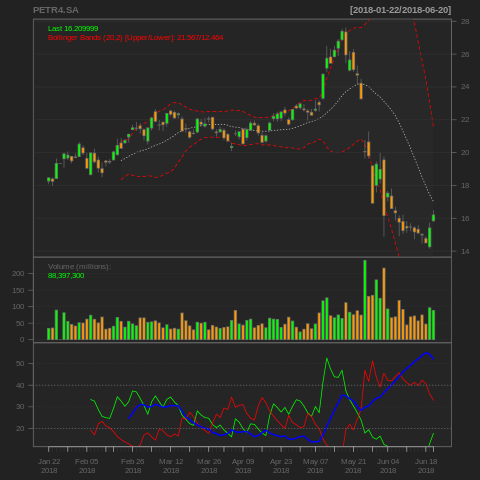

In [29]:
%%R
# Adicionando o indicador ADX, média 11 do tipo exponencial
?addADX
addADX(n = 11, maType = "EMA")

In [0]:
%%R
# Calculando logs diários
?log
PETR4.SA.ret <- diff(log(PETR4.SA.Close), lag = 1)

In [0]:
%%R
# Calculando logs diários
?log
PETR4.SA.ret <- diff(log(PETR4.SA.Close), lag = 1)

In [0]:
%%R
# Remove valores NA na prosição 1
PETR4.SA.ret <- PETR4.SA.ret[-1] 

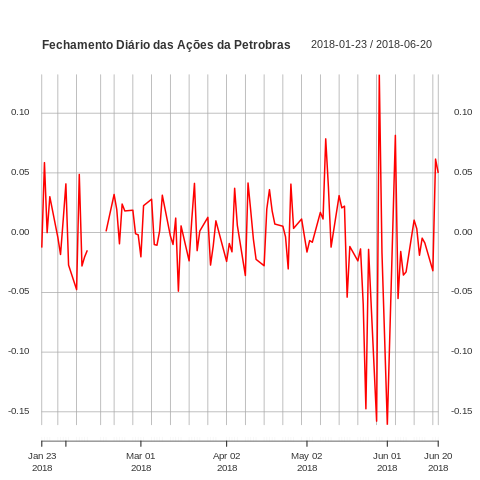

In [34]:
%%R
# Plotar a taxa de retorno
plot(PETR4.SA.ret, main = "Fechamento Diário das Ações da Petrobras",
     col = "red", xlab = "Data", ylab = "Retorno", major.ticks = 'months',
     minor.ticks = FALSE)

In [35]:
%%R
# Calculando algumas medidas estatísticas
statNames <- c("Mean", "Standard Deviation", "Skewness", "Kurtosis")
PETR4.SA.stats <- c(mean(PETR4.SA.ret), sd(PETR4.SA.ret), skewness(PETR4.SA.ret), kurtosis(PETR4.SA.ret))
names(PETR4.SA.stats) <- statNames
PETR4.SA.stats

              Mean Standard Deviation           Skewness           Kurtosis 
                NA                 NA                 NA                 NA 


In [36]:
%%R
# Salvando os dados em um arquivo .rds (arquivo em formato binário do R)
# getSymbols("PETR4.SA", src = 'yahoo')
saveRDS(PETR4.SA, file = "PETR4.SA.rds") # Salva os dados em formato binário
Ptr = readRDS("PETR4.SA.rds")
dir()
head(Ptr)

           PETR4.SA.Open PETR4.SA.High PETR4.SA.Low PETR4.SA.Close
2018-01-22         18.26         18.47        18.09          18.47
2018-01-23         18.40         18.46        18.00          18.24
2018-01-24         18.42         19.63        18.42          19.34
2018-01-25         19.34         19.34        19.34          19.34
2018-01-26         19.62         19.98        19.10          19.93
2018-01-29         19.67         20.05        19.57          19.85
           PETR4.SA.Volume PETR4.SA.Adjusted
2018-01-22        33920000          17.13501
2018-01-23        35567700          16.92163
2018-01-24        89768200          17.94212
2018-01-25               0          17.94212
2018-01-26        81989500          18.48948
2018-01-29        55726200          18.41526
